<a href="https://colab.research.google.com/github/mtstolledo/Data_Science_Alura-/blob/main/Analise_e_visualizacao_de_dados/Introducao_a_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instalando a nova versão do seaborn 

In [ ]:
!pip install seaborn==0.9.0

import seaborn as sns
print(sns.__version__)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.1/208.1 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
0.9.0


# Analisando as notas em geral

In [ ]:
import pandas as pd
notas = pd.read_csv("/content/ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas.shape

(100836, 4)

In [ ]:
notas.columns = ["usuarioId", "filmeId","nota", "momento"]
notas.head() 

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas["nota"].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [ ]:
notas["nota"].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [ ]:
print("Media =",notas["nota"].mean())
print("Mediana =",notas["nota"].median())

Media = 3.501556983616962
Mediana = 3.5


<Axes: ylabel='Frequency'>

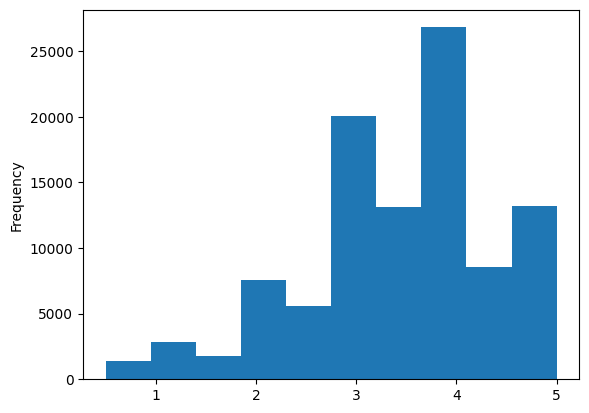

In [ ]:
notas.nota.plot(kind="hist")

In [ ]:
notas.plot

In [ ]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [ ]:
import seaborn as sns

<Axes: xlabel='nota'>

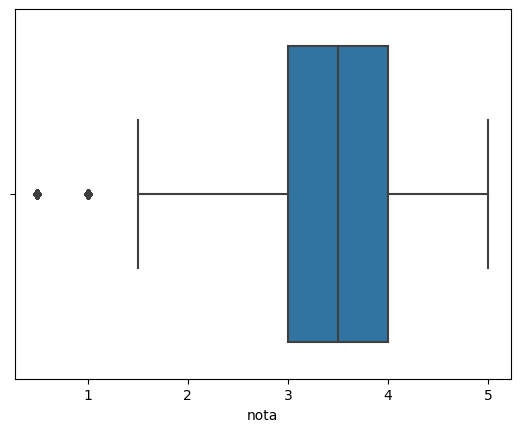

In [ ]:
sns.boxplot(notas.nota)

# Visualizando os filmes

In [ ]:
filmes = pd.read_csv("/content/movies.csv")
filmes.columns = ["filmeId","titulo","generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# Analisando algumas notas específicas por filme

In [ ]:
notas.query("filmeId==1").nota.mean()

3.9209302325581397

In [ ]:
notas.query("filmeId==2").nota.mean()

3.4318181818181817

In [ ]:
medias_por_filme = notas.groupby("filmeId").mean().nota
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

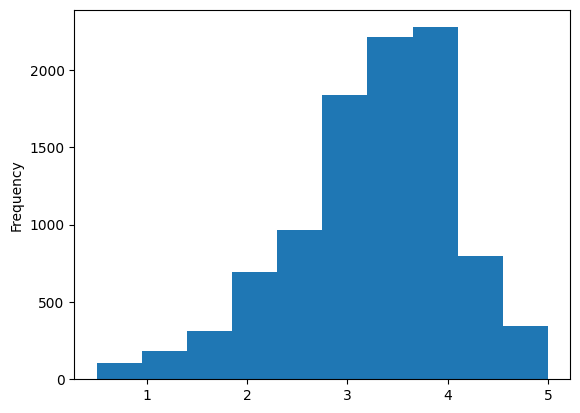

In [ ]:
medias_por_filme.plot(kind="hist")

<Axes: ylabel='nota'>

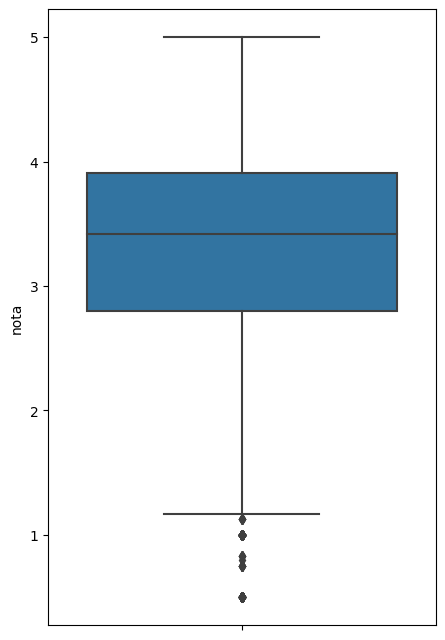

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,8))
sns.boxplot(y=medias_por_filme)

In [ ]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

<Axes: xlabel='nota'>

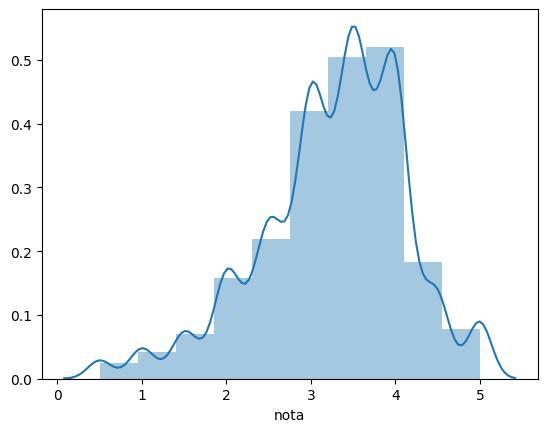

In [ ]:
sns.distplot(medias_por_filme, bins =10)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

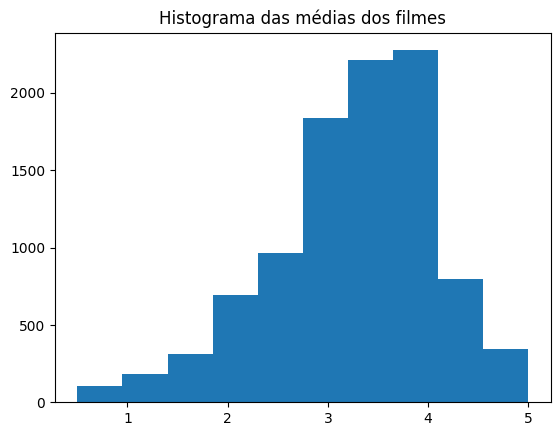

In [ ]:
import matplotlib.pyplot as plt
plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

In [ ]:
tmdb = pd.read_csv("/content/tmdb_5000_movies.csv")
tmdb.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800.0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,9.610000e+08,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500.0
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,8.806746e+08,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466.0
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1.084939e+09,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106.0
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,2.841391e+08,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124.0


In [ ]:
tmdb.original_language.unique() #categórica nominal 

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta'], dtype=object)

In [ ]:
# primeiro grau 
# segundo grau
# terceiro grau
# 1 grau < 2 grau < 3 grau # categórica ordinal 

In [ ]:
# budget => orcametno => quantitativa continuo 

In [ ]:
# quantidade de votos => 1,2,3,4 não tem 2,5 votos.
#notas de movielens => 05, 1, 1.5, ..., 5 não tem 2.7

#Visualizando gráficos por categoria

In [ ]:
tmdb["original_language"].value_counts().index

Index(['en', 'fr', 'zh', 'ja', 'ru', 'cn', 'es', 'de', 'ko', 'hi', 'te', 'it',
       'nl', 'ta'],
      dtype='object')

In [ ]:
tmdb["original_language"].value_counts().values

array([2367,   19,   13,    7,    6,    6,    5,    5,    2,    1,    1,
          1,    1,    1])

In [ ]:
contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language","total"] 
contagem_de_lingua.head()                         

,original_language,total
0,en,2367
1,fr,19
2,zh,13
3,ja,7
4,ru,6


<Axes: xlabel='original_language', ylabel='total'>

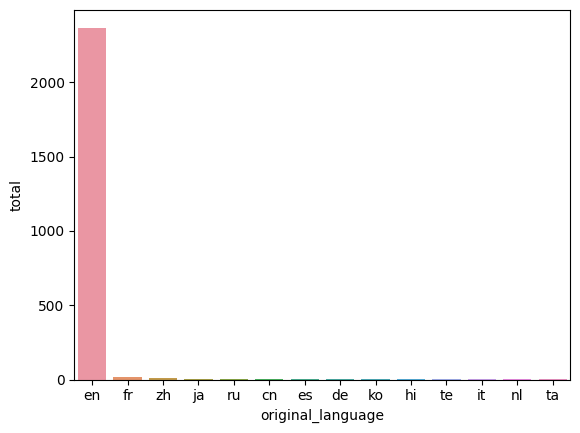

In [ ]:
sns.barplot(x="original_language", y = "total", data = contagem_de_lingua)

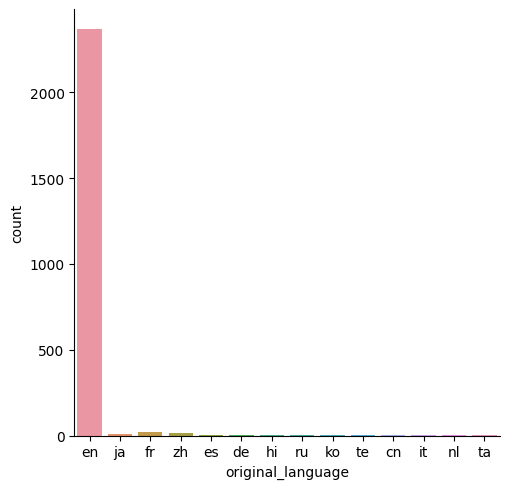

In [ ]:
sns.catplot(x = "original_language", kind="count", data = tmdb)

#Evite utilizar o gráfico de pizza quando há muitas variáveis, infomações...

([<matplotlib.patches.Wedge at 0x7f2580935e50>,
 [Text(-1.0957693797927701, 0.09638187749036796, 'en'),
  Text(1.0874913124609855, -0.16541658115764346, 'fr'),
  Text(1.093392038229083, -0.12039040965646587, 'zh'),
  Text(1.096134218690085, -0.09213997295786835, 'ja'),
  Text(1.0975253770399418, -0.0737431132603825, 'ru'),
  Text(1.098535501060826, -0.0567428665916731, 'cn'),
  Text(1.0992301410636445, -0.04114725965602744, 'es'),
  Text(1.0996695148438866, -0.02696216094846878, 'de'),
  Text(1.099868167809058, -0.01702978098348999, 'ko'),
  Text(1.0999258435670312, -0.012772574265001295, 'hi'),
  Text(1.0999551396137577, -0.009934326211621932, 'te'),
  Text(1.0999771118589305, -0.007096012012787063, 'it'),
  Text(1.099991760156253, -0.00425765056676735, 'nl'),
  Text(1.0999990844081922, -0.0014192607721480325, 'ta')])

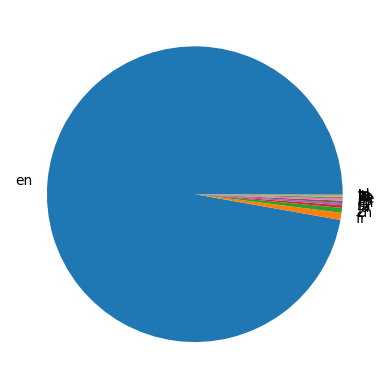

In [ ]:
plt.pie(contagem_de_lingua["total"], labels = contagem_de_lingua["original_language"])

#Passando uma mensagem através de visualização
###* Comparando a Língua Inglesa com o restante das outras Línguas. 

In [ ]:
total_por_lingua = tmdb["original_language"].value_counts()
total_de_ingles = total_por_lingua.loc["en"]
total_geral = total_por_lingua.sum()
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)


2367 68


In [ ]:
dados = {
    "lingua" : ["ingles","outros"],
    "total" : [total_de_ingles,total_do_resto]
}
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,2367
1,outros,68


<Axes: xlabel='lingua', ylabel='total'>

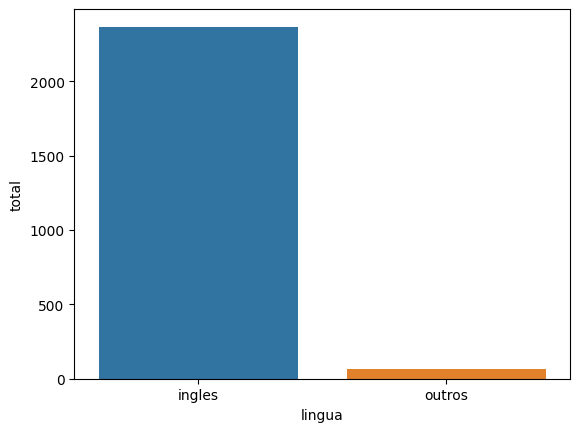

In [ ]:
sns.barplot(x="lingua", y="total", data= dados)

In [ ]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_de_outros_filmes

fr    19
zh    13
ja     7
ru     6
cn     6
es     5
de     5
ko     2
hi     1
te     1
it     1
nl     1
ta     1
Name: original_language, dtype: int64

##Refinando visualizações

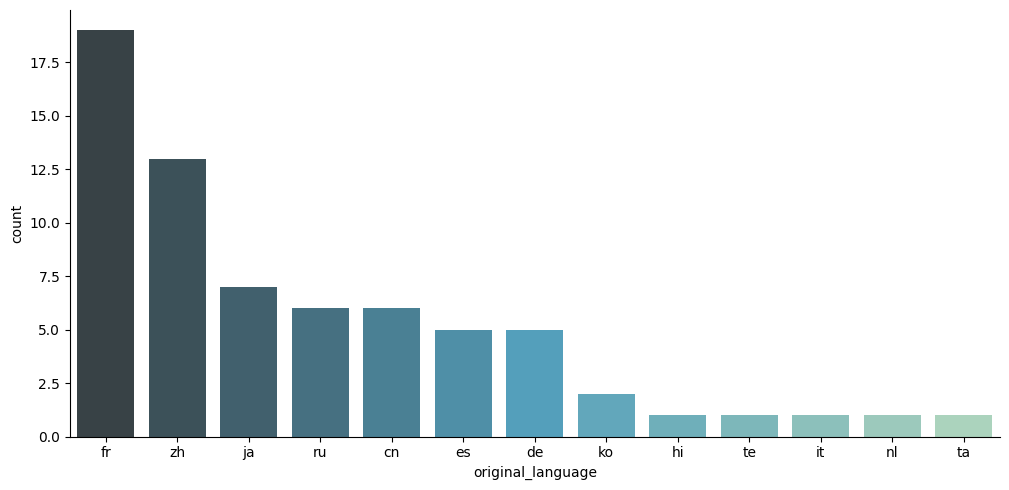

In [ ]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
sns.catplot(x = "original_language", kind="count",
              data = filmes_sem_lingua_original_em_ingles,
            aspect = 2, 
            palette="GnBu_d",
            order = total_por_lingua_de_outros_filmes.index)

#Revisando o papel da média, mediana, medidas de tendência central, dispersão, desvio padrão, box plot, histograma

In [ ]:

filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [ ]:
notas_do_toy_story = notas.query("filmeId == 1")
notas_do_jumanji = notas.query("filmeId==2")
print(len(notas_do_toy_story), len(notas_do_jumanji))

215 110


In [ ]:
print("Nota média do Toy Story: %.2f" % notas_do_toy_story.nota.mean())
print("Nota média do Jumanji: %.2f" % notas_do_jumanji.nota.mean())

Nota média do Toy Story: 3.92
Nota média do Jumanji: 3.43


In [ ]:
print("Desvio padrão do filme Toy Story: %.3f " % notas_do_toy_story.nota.std(), "\nDesvio padrão do filme Jumanji:  %.3f " % notas_do_jumanji.nota.std())

Desvio padrão do filme Toy Story: 0.835  
Desvio padrão do filme Jumanji:  0.882 


In [ ]:
print("Nota mediana do Toy Story: %.2f" % notas_do_toy_story.nota.median())
print("Nota mediana do Jumanji: %.2f" % notas_do_jumanji.nota.median())

Nota mediana do Toy Story: 4.00
Nota mediana do Jumanji: 3.50


In [ ]:
import numpy as np

filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))

In [ ]:
print(filme1.mean(), filme2.mean())
print(np.std(filme1), np.std(filme2))
print(np.median(filme1), np.median(filme2))

3.0 3.0
0.5 2.0
3.0 3.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

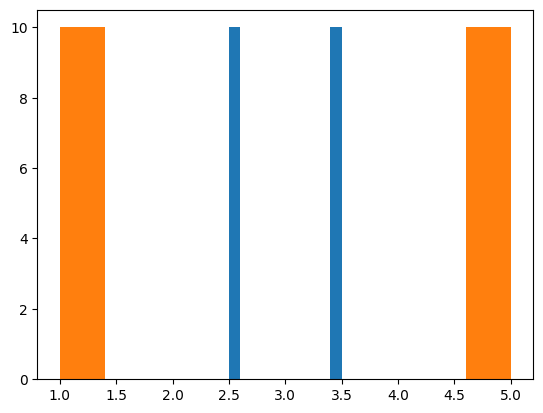

In [ ]:
plt.hist(filme1)
plt.hist(filme2)  

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2578a8b5b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2578a8baf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2578a8b310>,
 'medians': [<matplotlib.lines.Line2D at 0x7f2578a97070>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2578ab5a30>,
 'means': []}

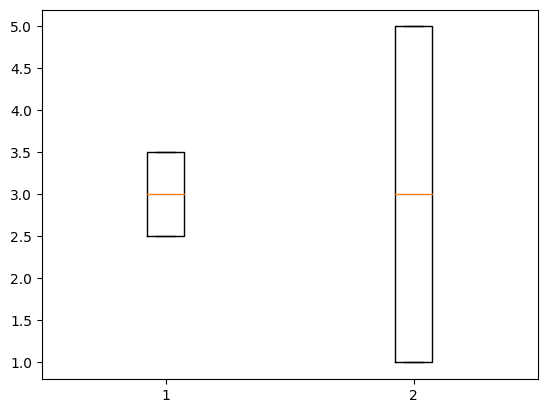

In [ ]:
plt.boxplot([filme1, filme2])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2578a17640>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2578a17b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2578a173a0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f25789a6130>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f25789a63d0>,
 'means': []}

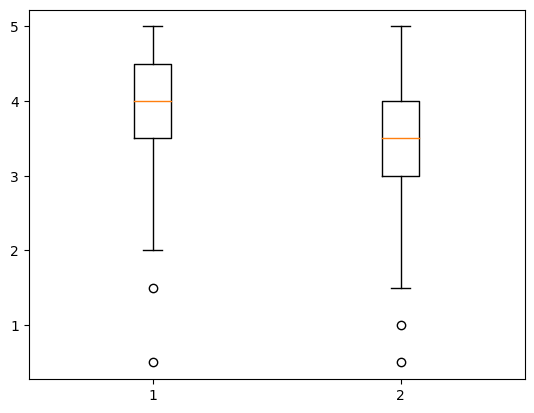

In [ ]:
plt.boxplot([notas_do_toy_story.nota, notas_do_jumanji.nota])

<Axes: xlabel='filmeId', ylabel='nota'>

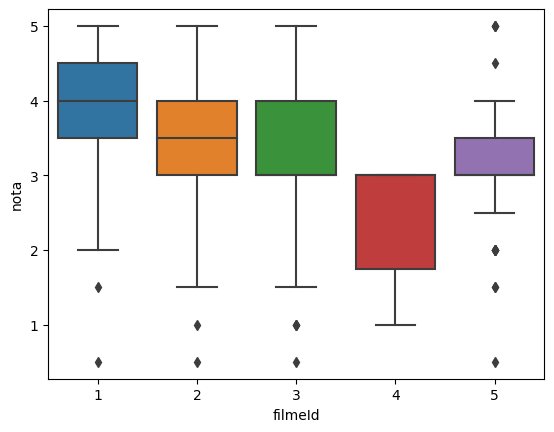

In [ ]:
sns.boxplot(x = "filmeId", y = "nota", data = notas.query("filmeId in [1,2,3,4,5]"))
     